In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, color, transform, filters, feature, draw, registration

plt.set_cmap('gray') # set default colormap to 'gray'

<Figure size 640x480 with 0 Axes>

In [2]:
img = util.img_as_float32( color.rgb2gray( io.imread('data/Mines_Teddy_Bear.png') ) )
img = transform.rescale(img, 1/2)
# plt.imshow(img)

### Optical flow

Text(0.5, 1.0, 'Optical flow magnitude and vector field')

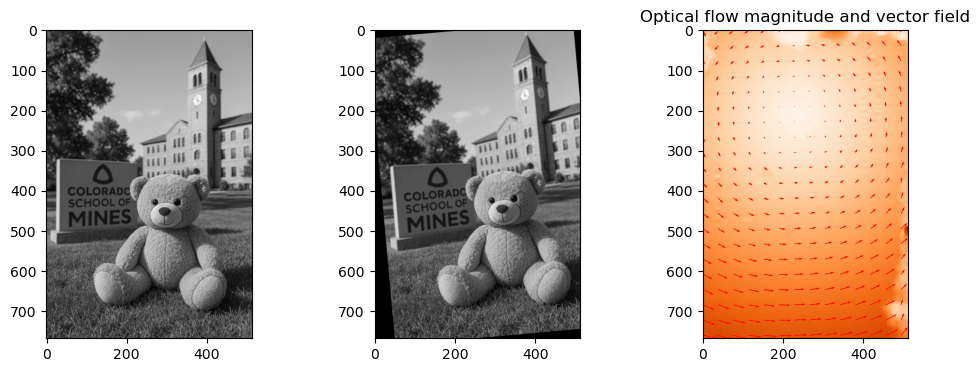

In [3]:
tform = transform.AffineTransform(scale=(1,1), rotation=0.09, translation=(20, -20))
img2 = transform.warp(img, tform)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].imshow(img)
ax[1].imshow(img2)

# Lucas-Kanade optical flow
v,u = registration.optical_flow_ilk(img, img2)

# optical flow norm
norm = np.sqrt(u**2 + v**2)

# Quiver plot arrows
nvec = 20  # Number of vectors to be displayed along each image dimension
nl, nc = img.shape
step = max(nl // nvec, nc // nvec)
y, x = np.mgrid[0:nl:step, 0:nc:step]
u_ = u[0::step, 0::step]
v_ = v[0::step, 0::step]

ax[2].imshow(norm, cmap='Oranges')
ax[2].quiver(x, y, u_, v_, color='r', units='dots', angles='xy', scale_units='xy', lw=3)
ax[2].set_title("Optical flow magnitude and vector field")
